In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
%pip install scikit-learn>=1.0.0

zsh:1: 1.0.0 not found
Note: you may need to restart the kernel to use updated packages.


In [4]:
from packaging import version

import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [5]:
# %pip install --upgrade pip
%pip install -U scikit-learn
%pip install -U matplotlib
%pip install -U pandas
%pip install -U numpy
%pip install --upgrade certifi
%pip install -U requests

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
from packaging import version

import sklearn


assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [2]:
# Let's define the default font sizes, to plot pretty figures:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
import numpy as np

np.random.seed(42)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import ssl
from sklearn.linear_model import LinearRegression
%pip install --upgrade certifi
# Temporary workaround for development: disable SSL verification
ssl._create_default_https_context = ssl._create_unverified_context

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Download and prepare the data
data_root = "https://github.com/ageron/data/blob/main/lifesat/lifesat.csv?raw=true"
try:
    lifesat = pd.read_csv(data_root, on_bad_lines='skip', index_col=0)
except Exception as e:
    print("Error reading CSV file", e)
    sys.exit(1)

print(lifesat)

                GDP per capita (USD)  Life satisfaction
Country                                                
Russia                  26456.387938                5.8
Greece                  27287.083401                5.4
Turkey                  28384.987785                5.5
Latvia                  29932.493910                5.9
Hungary                 31007.768407                5.6
Portugal                32181.154537                5.4
Poland                  32238.157259                6.1
Estonia                 35638.421351                5.7
Spain                   36215.447591                6.3
Slovenia                36547.738956                5.9
Lithuania               36732.034744                5.9
Israel                  38341.307570                7.2
Italy                   38992.148381                6.0
United Kingdom          41627.129269                6.8
France                  42025.617373                6.5
New Zealand             42404.393738            

In [3]:
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

<Axes: xlabel='GDP per capita (USD)', ylabel='Life satisfaction'>

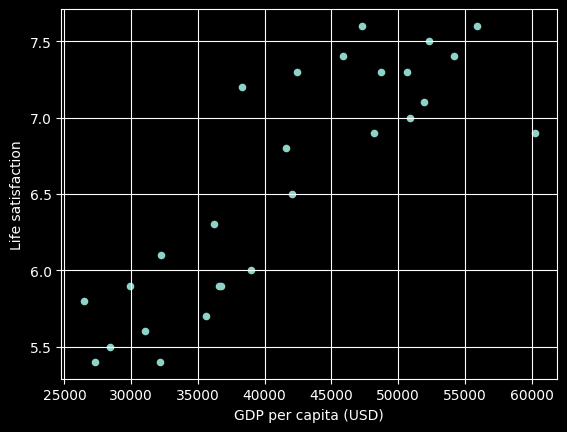

In [4]:
# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")

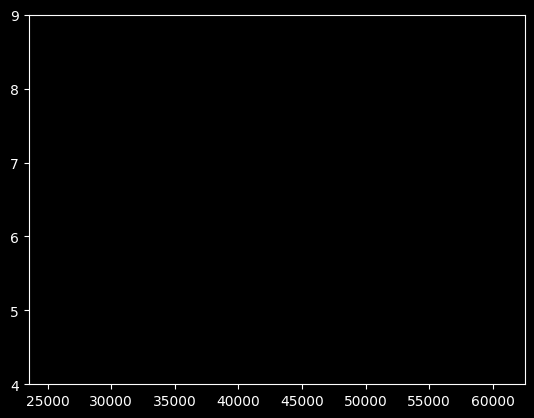

In [5]:
plt.axis([23_500, 62_500, 4, 9])
plt.show()

In [6]:
# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new)) # outputs [[6.30165767]]

[[6.30165767]]


In [8]:
# Check the close countries
# Israel                  38341.307570                7.2
#Slovenia                36547.738956                5.9
#Lithuania               36732.034744                5.9
# If we use the instance based learning , we get 6.3 by averaging 3 nearest neighbors , known as K-nearest neighbours regression


In [9]:
# Now trying with k-nearest neighbors regression

In [16]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)
X_new = [[37_655.2]]
print(model.predict(X_new))

[[6.33333333]]
